## Download de depend√™ncias

Este comando utiliza o gerenciador de pacotes `pip` para instalar um conjunto de bibliotecas Python essenciais para manipula√ß√£o de dados, visualiza√ß√£o, aprendizado de m√°quina e computa√ß√£o num√©rica. As bibliotecas instaladas s√£o: `pandas` para estruturas de dados e ferramentas de an√°lise de dados; `matplotlib` e `seaborn` para cria√ß√£o de gr√°ficos est√°ticos, animados e interativos; `scikit-learn` para algoritmos de aprendizado de m√°quina; `tensorflow` para computa√ß√£o num√©rica e aprendizado de m√°quina em larga escala; e `plotly` para visualiza√ß√µes interativas.

In [2]:
!pip install pandas matplotlib seaborn scikit-learn tensorflow plotly

Defaulting to user installation because normal site-packages is not writeable


## Importar bibliotecas Python

Este trecho de c√≥digo importa diversas bibliotecas e m√≥dulos Python essenciais para manipula√ß√£o de dados, processamento de texto, aprendizado de m√°quina e visualiza√ß√£o. S√£o importados: `numpy` para opera√ß√µes num√©ricas; `pandas` para manipula√ß√£o e an√°lise de estruturas de dados; `plotly.express` para cria√ß√£o de visualiza√ß√µes interativas; e `re` para opera√ß√µes com express√µes regulares. Do `tensorflow.keras`, s√£o importados `Tokenizer` para converter texto em sequ√™ncias num√©ricas e `pad_sequences` para garantir que essas sequ√™ncias tenham o mesmo comprimento. Da biblioteca `sklearn.metrics`, s√£o trazidos `classification_report`, `confusion_matrix`, e `ConfusionMatrixDisplay` para avalia√ß√£o de modelos de classifica√ß√£o, e `matplotlib.pyplot` √© importado para plotagem gr√°fica. Para divis√£o de dados e valida√ß√£o cruzada, s√£o importados `train_test_split` e `KFold` de `sklearn.model_selection`. Finalmente, a biblioteca `tensorflow` √© importada, geralmente referenciada como `tf`, para desenvolvimento e treinamento de modelos de aprendizado de m√°quina, especialmente redes neurais.

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf

2025-05-31 21:11:05.159928: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 21:11:05.160743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 21:11:05.165403: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 21:11:05.178301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748736665.199838   56745 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748736665.20

## Carregar dataset

Este segmento de c√≥digo utiliza a biblioteca `pandas` para carregar dados de dois arquivos CSV distintos em DataFrames. O primeiro comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')`, l√™ o arquivo `True.csv`, localizado no diret√≥rio especificado, e armazena seu conte√∫do em um DataFrame chamado `true_df`. De forma an√°loga, o segundo comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')`, carrega os dados do arquivo `Fake.csv` para um DataFrame denominado `fake_df`. Presume-se que estes arquivos contenham, respectivamente, not√≠cias verdadeiras e falsas.

In [4]:
true_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')
fake_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')

## Adicionar nova coluna "label"

Este trecho de c√≥digo adiciona uma nova coluna chamada `label` a dois DataFrames existentes, `true_df` e `fake_df`. Ao DataFrame `true_df`, √© atribu√≠do o valor inteiro `1` para todas as entradas nesta nova coluna `label`. De forma similar, ao DataFrame `fake_df`, √© atribu√≠do o valor inteiro `0` para todas as entradas na coluna `label`. Esta opera√ß√£o √© tipicamente realizada para criar uma vari√°vel alvo em tarefas de classifica√ß√£o, distinguindo as amostras dos dois DataFrames (por exemplo, not√≠cias verdadeiras e falsas).

In [5]:
true_df['label'] = 1
fake_df['label'] = 0

## Cominar DataFrames

Este trecho de c√≥digo realiza a combina√ß√£o e o embaralhamento de dois DataFrames, `true_df` e `fake_df`, utilizando a biblioteca `pandas`. Primeiramente, a fun√ß√£o `pd.concat([true_df, fake_df])` une os dois DataFrames verticalmente, empilhando suas linhas para criar um √∫nico DataFrame consolidado. Subsequentemente, o m√©todo `.sample(frac=1, random_state=42)` √© aplicado a este DataFrame combinado. O argumento `frac=1` especifica que todas as linhas do DataFrame devem ser selecionadas (ou seja, 100% da amostra), e `random_state=42` garante que a ordem do embaralhamento seja a mesma sempre que o c√≥digo for executado, proporcionando reprodutibilidade. O DataFrame resultante, agora contendo os dados de ambos os DataFrames originais de forma aleatoriamente misturada, √© atribu√≠do √† vari√°vel `df`.

In [6]:
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42)

### Limpeza e pr√©-tratamento textual

Este trecho de c√≥digo define uma fun√ß√£o para limpeza de texto e, em seguida, a aplica a uma coluna de um DataFrame `pandas`. A fun√ß√£o `clean_text` recebe uma string como entrada, converte todos os caracteres para min√∫sculas e utiliza express√µes regulares (`re.sub`) para remover quaisquer caracteres que n√£o sejam letras do alfabeto (mai√∫sculas ou min√∫sculas) ou espa√ßos em branco. O resultado √© uma vers√£o simplificada do texto original, contendo apenas palavras e espa√ßos. Subsequentemente, esta fun√ß√£o `clean_text` √© aplicada a cada elemento da coluna `text` do DataFrame `df`, e os textos resultantes, j√° limpos, s√£o armazenados em uma nova coluna chamada `cleaned_text` dentro do mesmo DataFrame.

In [7]:
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower())
df['cleaned_text'] = df['text'].apply(clean_text)

## Tokeniza√ß√£o e padroniza√ß√£o

Este trecho de c√≥digo transforma dados textuais da coluna `cleaned_text` de um DataFrame `df` em um formato num√©rico adequado para modelos de aprendizado de m√°quina, al√©m de preparar os r√≥tulos correspondentes. Primeiramente, s√£o definidos os par√¢metros `max_words` como 5000, limitando o vocabul√°rio √†s palavras mais frequentes, e `max_len` como 200, estabelecendo o comprimento fixo das sequ√™ncias de texto. Um objeto `Tokenizer` do Keras √© ent√£o inicializado com `num_words=max_words` e `oov_token='<OOV>'`, que ser√° usado para representar palavras fora do vocabul√°rio. Este `tokenizer` √© treinado com os textos da coluna `df['cleaned_text']`. Em seguida, os textos s√£o convertidos em sequ√™ncias de inteiros (`texts_to_sequences`), e essas sequ√™ncias s√£o padronizadas para o comprimento `max_len` atrav√©s da fun√ß√£o `pad_sequences`, resultando na matriz `X`. Por fim, os valores da coluna `label` do DataFrame s√£o extra√≠dos como um array NumPy e atribu√≠dos √† vari√°vel `y`.

In [8]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

## Divis√£o do conjunto de dados

Este comando utiliza a fun√ß√£o `train_test_split` da biblioteca `scikit-learn` para dividir os conjuntos de dados de caracter√≠sticas `X` e de r√≥tulos `y` em subconjuntos de treinamento e teste. A divis√£o √© configurada pelo par√¢metro `test_size=0.4`, que especifica que 40% dos dados ser√£o alocados para o conjunto de teste, enquanto os 60% restantes formar√£o o conjunto de treinamento. O argumento `random_state=42` √© usado para garantir que a divis√£o seja feita da mesma maneira sempre que o c√≥digo for executado, assegurando a reprodutibilidade dos resultados. Como resultado, s√£o geradas quatro vari√°veis: `X_train` e `y_train` contendo as caracter√≠sticas e r√≥tulos para treinamento do modelo, e `X_test` e `y_test` contendo as caracter√≠sticas e r√≥tulos para avalia√ß√£o do modelo.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Constru√ß√£o do modelo

Este trecho de c√≥digo define e compila um modelo de rede neural utilizando a API funcional do Keras, projetado para tarefas de classifica√ß√£o bin√°ria de texto. Primeiramente, uma camada de entrada `text_input` √© definida para receber sequ√™ncias de texto com comprimento `max_len`. Essas sequ√™ncias s√£o ent√£o processadas por uma camada `Embedding` que mapeia cada palavra do vocabul√°rio (`max_words`) para um vetor denso de 64 dimens√µes. A sa√≠da da camada de embedding √© alimentada em uma camada `Bidirectional GRU` (Gated Recurrent Unit) com 32 unidades, que processa a sequ√™ncia em ambas as dire√ß√µes para capturar o contexto. Para regulariza√ß√£o e preven√ß√£o de overfitting, uma camada `Dropout` com taxa de 0.5 √© aplicada, seguida por uma camada `Dense` com 32 unidades, ativa√ß√£o ReLU e regulariza√ß√£o L2 (com fator de 0.01). A camada final √© uma `Dense` com uma √∫nica unidade e ativa√ß√£o sigmoide, que produz a probabilidade para a classifica√ß√£o bin√°ria. O `tf.keras.Model` √© ent√£o instanciado com as entradas e sa√≠das definidas. Por fim, o modelo √© compilado com o otimizador 'adam', a fun√ß√£o de perda 'binary_crossentropy' (adequada para problemas de duas classes) e configurado para rastrear as m√©tricas de 'accuracy' e 'AUC'. O comando `model.summary()` exibe um resumo da arquitetura do modelo, detalhando as camadas e o n√∫mero de par√¢metros.

In [10]:
text_input = tf.keras.Input(shape=(max_len,), name='text')
text_emb = tf.keras.layers.Embedding(input_dim=max_words, output_dim=64)(text_input)
text_out = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32))(text_emb)

dropout = tf.keras.layers.Dropout(0.5)(text_out)
dense = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=text_input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
model.summary()

2025-05-31 21:11:54.798095: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ text (InputLayer)               ‚îÇ (None, 200)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding (Embedding)           ‚îÇ (None, 200, 64)        ‚îÇ       320,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ (None, 64)             ‚îÇ        18,816 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 340,929 (1.30 MB)

 Trainable params: 340,929 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

## Treinamento do modelo

Este segmento de c√≥digo executa o treinamento de um modelo Keras (`model`) previamente definido e compilado. S√£o estabelecidos o tamanho do lote (`batch_size`) em 32 e o n√∫mero de √©pocas (`epochs`) em 5. Uma lista de `callbacks` √© configurada para otimizar o processo de treinamento: `tf.keras.callbacks.EarlyStopping` √© usado para interromper o treinamento prematuramente se a m√©trica monitorada (geralmente a perda de valida√ß√£o) n√£o melhorar ap√≥s 2 √©pocas (`patience=2`), com a op√ß√£o `restore_best_weights=True` para reter os pesos do modelo da melhor √©poca. Adicionalmente, `tf.keras.callbacks.ReduceLROnPlateau` reduzir√° a taxa de aprendizado pela metade (`factor=0.5`) se n√£o houver melhora na m√©trica monitorada por 1 √©poca (`patience=1`). O treinamento √© iniciado chamando `model.fit()`, que utiliza os dados de treinamento `X_train` e `y_train`. Durante o treinamento, 20% dos dados de treinamento (`validation_split=0.2`) s√£o automaticamente separados para valida√ß√£o. O processo utiliza o `batch_size`, `epochs` e `callbacks` especificados, e o hist√≥rico do treinamento (incluindo perdas e m√©tricas por √©poca) √© armazenado na vari√°vel `history`.

In [11]:
batch_size = 32
epochs = 5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)
]
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 155s 160ms/step - accuracy: 0.8678 - auc: 0.9368 - loss: 0.4313 - val_accuracy: 0.9698 - val_auc: 0.9943 - val_loss: 0.1079 - learning_rate: 0.0010
Epoch 2/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 141s 157ms/step - accuracy: 0.9751 - auc: 0.9951 - loss: 0.0907 - val_accuracy: 0.9841 - val_auc: 0.9980 - val_loss: 0.0622 - learning_rate: 0.0010
Epoch 3/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182s 203ms/step - accuracy: 0.9874 - auc: 0.9985 - loss: 0.0502 - val_accuracy: 0.9884 - val_auc: 0.9984 - val_loss: 0.0454 - learning_rate: 0.0010
Epoch 4/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 181s 202ms/step - accuracy: 0.9945 - auc: 0.9995 - loss: 0.0252 - val_accuracy: 0.9905 - val_auc: 0.9983 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 5/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 170s 189ms/st

## Visualiza√ß√£o de resultados

Este trecho de c√≥digo √© dedicado √† visualiza√ß√£o do hist√≥rico de treinamento de um modelo e √† avalia√ß√£o de seu desempenho no conjunto de teste. Inicialmente, s√£o gerados e exibidos dois gr√°ficos de linha utilizando `plotly.express`: o primeiro mostra a evolu√ß√£o da perda de treinamento (`loss`) e de valida√ß√£o (`val_loss`) ao longo das √©pocas, e o segundo apresenta a evolu√ß√£o da m√©trica AUC (√Årea Sob a Curva ROC) de treinamento (`auc`) e de valida√ß√£o (`val_auc`). Em seguida, o c√≥digo realiza previs√µes no conjunto de teste `X_test` utilizando o modelo treinado (`model.predict`). Essas previs√µes, que s√£o probabilidades, s√£o convertidas em r√≥tulos de classe bin√°rios (0 ou 1) com base em um limiar de 0.5. Uma matriz de confus√£o √© ent√£o calculada comparando os r√≥tulos verdadeiros `y_test` com os r√≥tulos previstos `y_pred`, e esta matriz √© visualizada graficamente utilizando `ConfusionMatrixDisplay` e `matplotlib.pyplot`, com o t√≠tulo 'Matriz de Confus√£o'. Adicionalmente, um `classification_report` √© impresso, fornecendo m√©tricas detalhadas como precis√£o, recall e F1-score para as classes 'Fake' e 'True'. Por fim, o modelo √© avaliado no conjunto de teste `X_test` e `y_test` atrav√©s do m√©todo `model.evaluate()`, e os valores resultantes de precis√£o e AUC s√£o impressos formatados.

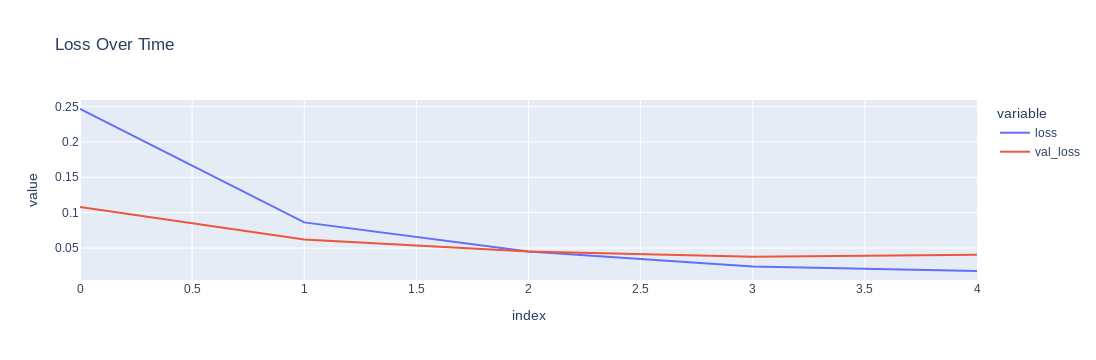

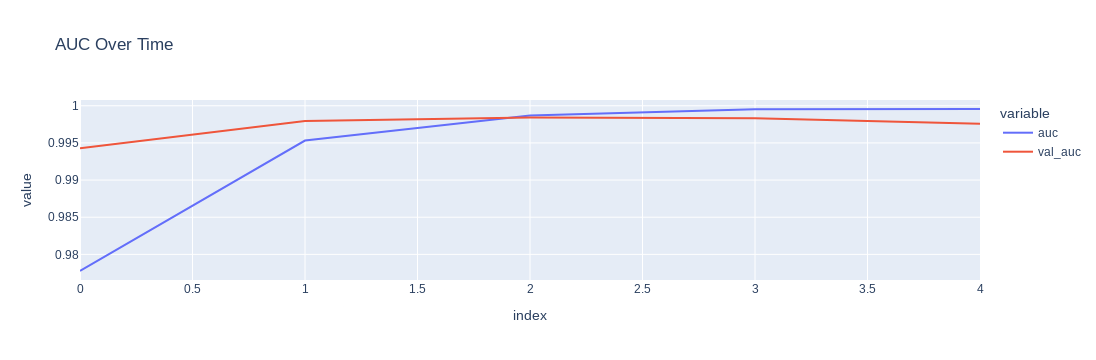

281/281 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 42ms/step


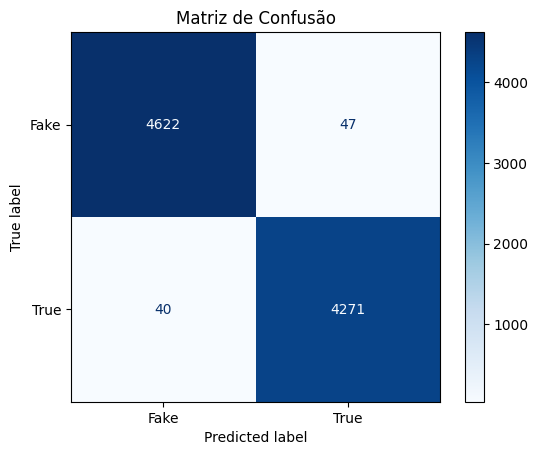

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4669
        True       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

281/281 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 47ms/step - accuracy: 0.9900 - auc: 0.9985 - loss: 0.0433
Precis√£o no conjunto de teste: 0.9903
AUC no conjunto de teste: 0.9988


In [12]:
fig = px.line(history.history, y=['loss', 'val_loss'], labels={'x': "Epoch", 'y': "Loss"}, title="Loss Over Time")
fig.show()
fig = px.line(history.history, y=['auc', 'val_auc'], labels={'x': "Epoch", 'y': "AUC"}, title="AUC Over Time")
fig.show()

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confus√£o')
plt.show()

print("Relat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred, target_names=['Fake', 'True']))
test_results = model.evaluate(X_test, y_test)
print(f"Precis√£o no conjunto de teste: {test_results[1]:.4f}")
print(f"AUC no conjunto de teste: {test_results[2]:.4f}")

## Valida√ß√£o cruzada K-Fold

Este trecho de c√≥digo implementa um procedimento de valida√ß√£o cruzada k-fold para treinar e avaliar um modelo de rede neural. Inicialmente, s√£o definidos os par√¢metros de configura√ß√£o: `k` (n√∫mero de folds) como 5, `epochs` como 5, `batch_size` como 32, `vocab_size` (tamanho do vocabul√°rio) como 10000, `embedding_dim` (dimens√£o da camada de embedding) como 100 e `max_len` (comprimento m√°ximo da sequ√™ncia) como 200. Um objeto `KFold` da biblioteca `scikit-learn` √© inicializado para dividir os dados em `k` subconjuntos (folds), com embaralhamento (`shuffle=True`) e um estado aleat√≥rio (`random_state=42`) para garantir a reprodutibilidade das divis√µes.

O c√≥digo ent√£o entra em um loop que itera `k` vezes, uma para cada fold. Em cada itera√ß√£o, o fold atual √© impresso. Os dados de treinamento (`X_train`, `y_train`) s√£o divididos em conjuntos de treinamento (`X_train_cv`, `y_train_cv`) e valida√ß√£o (`X_val_cv`, `y_val_cv`) espec√≠ficos para o fold corrente. Um novo modelo sequencial do Keras (`tf.keras.Sequential`) √© constru√≠do em cada fold, composto por uma camada `Embedding`, uma camada `Bidirectional LSTM` que retorna sequ√™ncias, uma camada `Dropout` (com taxa de 0.3), uma camada `GlobalAveragePooling1D` para reduzir a dimensionalidade temporal, uma camada `Dense` com ativa√ß√£o ReLU, outra camada `Dropout` (com taxa de 0.3), e uma camada `Dense` final com ativa√ß√£o sigmoide para classifica√ß√£o bin√°ria.

Este modelo rec√©m-criado √© compilado utilizando o otimizador 'adam', a fun√ß√£o de perda 'binary_crossentropy' e a m√©trica de 'accuracy'. Em seguida, o modelo √© treinado (`model.fit`) com os dados de treinamento do fold (`X_train_cv`, `y_train_cv`), utilizando os dados de valida√ß√£o do fold (`X_val_cv`, `y_val_cv`) para monitoramento, com `verbose=1` para exibir o progresso. Ap√≥s o treinamento, s√£o feitas previs√µes no conjunto de valida√ß√£o do fold, convertidas para inteiros (0 ou 1) com um limiar de 0.5, e um `classification_report` √© impresso para avaliar o desempenho do modelo naquele fold espec√≠fico. Por fim, o contador `fold` √© incrementado para a pr√≥xima itera√ß√£o.

In [13]:
k = 5
epochs = 5
batch_size = 32
vocab_size = 10000
embedding_dim = 100
max_len = 200

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

fold = 1
for train_idx, val_idx in kfold.split(X_train):
    print(f"\nüìò Fold {fold}")

    X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size,
              validation_data=(X_val_cv, y_val_cv), verbose=1)
    y_pred = (model.predict(X_val_cv) > 0.5).astype("int32")
    print(classification_report(y_val_cv, y_pred))
    fold += 1


üìò Fold 1
Epoch 1/5


/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167s 174ms/step - accuracy: 0.8713 - loss: 0.2651 - val_accuracy: 0.9774 - val_loss: 0.0661
Epoch 2/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 181s 202ms/step - accuracy: 0.9883 - loss: 0.0410 - val_accuracy: 0.9832 - val_loss: 0.0486
Epoch 3/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184s 205ms/step - accuracy: 0.9935 - loss: 0.0244 - val_accuracy: 0.9802 - val_loss: 0.0588
Epoch 4/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 201s 223ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.9855 - val_loss: 0.0525
Epoch 5/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199s 222ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9859 - val_loss: 0.0554
225/225 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 45ms/step
              precision    recall  f1-score   support

           0     

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199s 211ms/step - accuracy: 0.8787 - loss: 0.2660 - val_accuracy: 0.9813 - val_loss: 0.0606
Epoch 2/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 205s 215ms/step - accuracy: 0.9847 - loss: 0.0486 - val_accuracy: 0.9808 - val_loss: 0.0555
Epoch 3/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 177s 197ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9788 - val_loss: 0.0711
Epoch 4/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 230s 257ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9857 - val_loss: 0.0580
Epoch 5/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194s 217ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9866 - val_loss: 0.0504
225/225 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 59ms/step
              precision    recall  f1-score   support

       

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 205s 217ms/step - accuracy: 0.8718 - loss: 0.2628 - val_accuracy: 0.9733 - val_loss: 0.0738
Epoch 2/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 196s 219ms/step - accuracy: 0.9845 - loss: 0.0473 - val_accuracy: 0.9822 - val_loss: 0.0531
Epoch 3/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167s 186ms/step - accuracy: 0.9917 - loss: 0.0246 - val_accuracy: 0.9826 - val_loss: 0.0535
Epoch 4/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 160s 179ms/step - accuracy: 0.9940 - loss: 0.0210 - val_accuracy: 0.9836 - val_loss: 0.0586
Epoch 5/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 192s 213ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9848 - val_loss: 0.0560
225/225 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 51ms/step
              precision    recall  f1-score   support

           0     

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193s 191ms/step - accuracy: 0.8751 - loss: 0.2551 - val_accuracy: 0.9777 - val_loss: 0.0733
Epoch 2/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 170s 189ms/step - accuracy: 0.9803 - loss: 0.0590 - val_accuracy: 0.9869 - val_loss: 0.0465
Epoch 3/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 202s 190ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9830 - val_loss: 0.0533
Epoch 4/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 172s 191ms/step - accuracy: 0.9942 - loss: 0.0168 - val_accuracy: 0.9751 - val_loss: 0.1022
Epoch 5/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211s 202ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9850 - val_loss: 0.0584
225/225 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 45ms/step
              precision    recall  f1-score   support

       

/home/diogo/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167s 176ms/step - accuracy: 0.8856 - loss: 0.2543 - val_accuracy: 0.9678 - val_loss: 0.0834
Epoch 2/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 149s 166ms/step - accuracy: 0.9875 - loss: 0.0393 - val_accuracy: 0.9797 - val_loss: 0.0642
Epoch 3/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 151s 168ms/step - accuracy: 0.9954 - loss: 0.0162 - val_accuracy: 0.9806 - val_loss: 0.0574
Epoch 4/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 156s 174ms/step - accuracy: 0.9966 - loss: 0.0129 - val_accuracy: 0.9855 - val_loss: 0.0481
Epoch 5/5
898/898 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 155s 173ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9857 - val_loss: 0.0759
225/225 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 38ms/step
              precision    recall  f1-score   support

           0      